In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [2]:
# The data has already been sorted into training and test sets for us
(train_data,train_labels),(test_data,test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
# Show the first training example
print(f"Training Example :\n{train_data[0]}\n")
print(f"Train Labels:\n{train_labels[0]}\n")

Training Example :
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1

In [4]:
# Check the shape of our data
train_data.shape,train_labels.shape,test_data.shape,test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
train_data[0].shape,train_labels[0].shape

((28, 28), ())

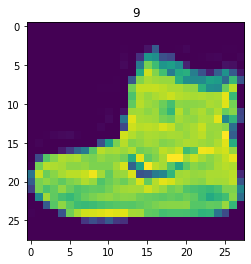

In [6]:
# Plot a single example
import matplotlib.pyplot as plt
plt.imshow(train_data[0]);
plt.title(train_labels[0]);

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

len(class_names)

10

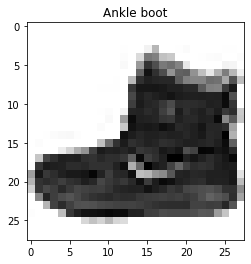

In [8]:
# Plot an example image and its label
plt.imshow(train_data[0],cmap=plt.cm.binary)
plt.title(class_names[train_labels[0]]);

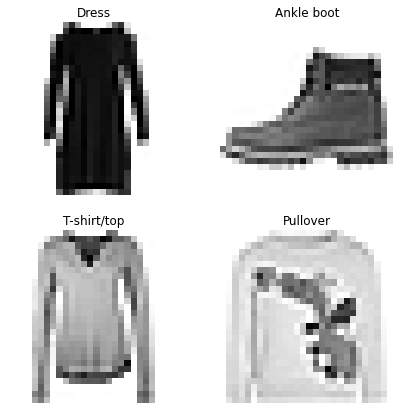

In [9]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
    ax=plt.subplot(2,2,i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

The input shape will have to deal with 28x28 tensors (the height and width of our images).
We're actually going to squash the input into a tensor (vector) of shape (784).
The output shape will have to be 10 because we need our model to predict for 10 different classes.
We'll also change the activation parameter of our output layer to be "softmax" instead of 'sigmoid'. As we'll see the "softmax" activation function outputs a series of values between 0 & 1 (the same shape as output shape, which together add up to ~1. The index with the highest value is predicted by the model to be the most likely class.
We'll need to change our loss function from a binary loss function to a multiclass loss function.
More specifically, since our labels are in integer form, we'll use tf.keras.losses.SparseCategoricalCrossentropy(), if our labels were one-hot encoded (e.g. they looked something like [0, 0, 1, 0, 0...]), we'd use tf.keras.losses.CategoricalCrossentropy().
We'll also use the validation_data parameter when calling the fit() function. This will give us an idea of how the model performs on the test set during training.

In [10]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="Softmax")
])

model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

norm_norm_history = model_1.fit(train_data,train_labels,epochs=10,validation_data=(test_data,test_labels))

2022-03-25 11:25:56.335326: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-25 11:25:56.455121: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-25 11:25:56.456237: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-25 11:25:56.458747: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.1792 - accuracy: 0.1608 - val_loss: 1.8065 - val_accuracy: 0.2020
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.7194 - accuracy: 0.2439 - val_loss: 1.6586 - val_accuracy: 0.3100
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6398 - accuracy: 0.2831 - val_loss: 1.6194 - val_accuracy: 0.2739
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6125 - accuracy: 0.2902 - val_loss: 1.6007 - val_accuracy: 0.3046
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5963 - accuracy: 0.3058 - val_loss: 1.5776 - val_accuracy: 0.3338
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5880 - accuracy: 0.3124 - val_loss: 1.5642 - val_accuracy: 0.3196
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5782 - accuracy: 0.3196 - val_loss: 1.5733 - val_accuracy:

In [11]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 4)                 3140      
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Check the min and max values of the training data
train_data.min(),train_data.max()

(0, 255)

In [13]:
# Divide train and test images by the maximum value (normalize it)
train_data = train_data/255.0
test_data = test_data/255.0

In [14]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="Softmax")
])

model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

norm_history = model_2.fit(train_data,train_labels,epochs=10,validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

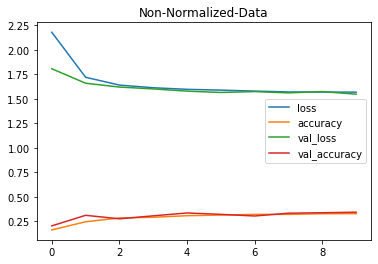

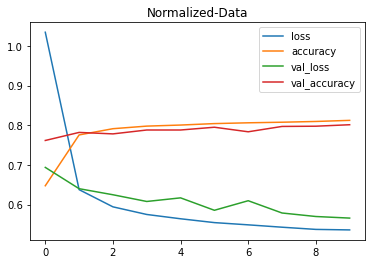

In [15]:
import pandas as pd 
# Plot non-normalized data loss curves
pd.DataFrame(norm_norm_history.history).plot(title="Non-Normalized-Data");
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized-Data");

In [16]:
# find the ideal learning rate

tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="Softmax")
])

model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**(epoch/20))

find_lr_history = model_3.fit(train_data,train_labels,epochs=40,validation_data=(test_data,test_labels),callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5542 - accuracy: 0.8036 - val_loss: 0.5898 - val_accuracy:

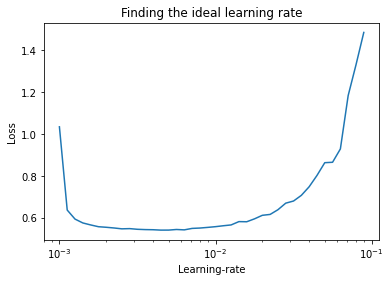

In [17]:
# Plot the learning rate decay curve
import numpy as np

lrs = 1e-3*(10**(np.arange(40)/20))
plt.semilogx(lrs,find_lr_history.history["loss"])
plt.xlabel("Learning-rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In this case, it looks like somewhere close to the default learning rate of the Adam optimizer (0.001) is the ideal learning rate.

In [18]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="Softmax")
])

model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(lr=0.001),
               metrics=["accuracy"])

history = model_4.fit(train_data,train_labels,epochs=30,validation_data=(test_data,test_labels))

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4985 - accuracy: 0.8228 - val_loss: 0.4301 - val_accuracy: 0.8415
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3683 - accuracy: 0.8641 - val_loss: 0.4307 - val_accuracy: 0.8479
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3347 - accuracy: 0.8757 - val_loss: 0.3758 - val_accuracy: 0.8626
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3112 - accuracy: 0.8854 - val_loss: 0.3658 - val_accuracy: 0.8687
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2970 - accuracy: 0.8891 - val_loss: 0.3610 - val_accuracy: 0.8649
Epoch 6/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2809 - accuracy: 0.8936 - val_loss: 0.3886 - val_accuracy: 0.8525
Epoch 7/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2718 - accuracy: 0.8982 - val_loss: 0.3694 - val_accuracy:

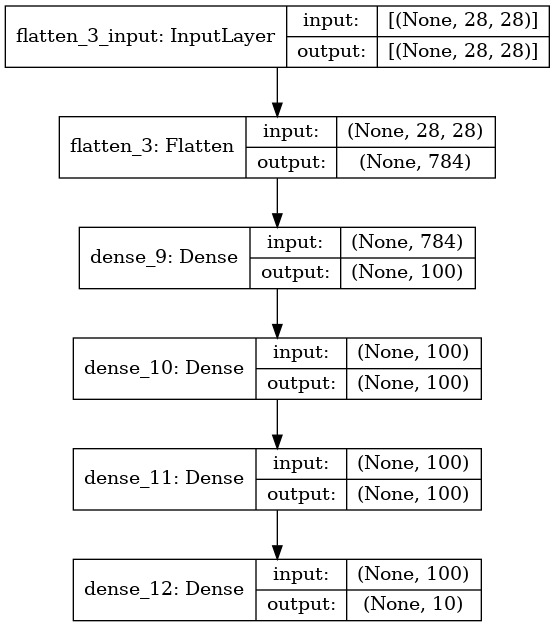

In [19]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_4,show_shapes=True)

In [20]:
model_4.evaluate(test_data,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4194 - accuracy: 0.8884


[0.4193935692310333, 0.8884000182151794]

In [21]:
# classification matrix

# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb

import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true,y_pred,classes=None,figsize=(10,10),text_size=15):
    """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """ 
    # Create the confustion matrix
    cm=confusion_matrix(y_true,y_pred)
    cm_norm = cm.astype("float")/cm.sum(axis=1)[:,np.newaxis] # normalize it
    n_classes = cm.shape[0] # find the number of classes we're dealing with
    
    # Plot the figure and make it pretty
    fig,ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm,cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
    fig.colorbar(cax)
    
    # Are there a list of classes?
    if classes:
        labels=classes
    else:
        labels=np.arange(cm.shape[0])
        
    # Label the axes
    ax.set(title="Confusion Matrix",
          xlabel="Predicted label",
          ylabel="True label",
          xticks=np.arange(n_classes), # create enough axis slots for each class
          yticks=np.arange(n_classes),
          xticklabels=labels, # axes will labeled with class names (if they exist) or ints
          yticklabels=labels)
    
    # Make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()
    
    # Set the threshold for different colors
    threshold = (cm.max() + cm.min())/2.
    
    # Plot the text on each cell
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,f"{cm[i,j]}({cm_norm[i,j]*100:.1f}%)",
                horizontalalignment="center",
                color="white" if cm[i,j]>threshold else "black",
                size=text_size)
    

In [22]:
# Make predictions with the most recent model
y_probs = model_4.predict(test_data) # "probs" is short for probabilities

y_probs[:5]

array([[3.61319286e-12, 9.16349990e-14, 4.59706004e-13, 3.14592519e-10,
        7.10730845e-14, 4.64114045e-08, 5.43565026e-10, 1.31483057e-06,
        1.37360531e-11, 9.99998689e-01],
       [3.34968007e-07, 3.06883650e-11, 9.93938208e-01, 1.40228942e-12,
        5.74916555e-03, 6.94361073e-13, 3.12216085e-04, 8.93053094e-16,
        3.66765711e-08, 1.28784795e-14],
       [4.59428486e-33, 1.00000000e+00, 0.00000000e+00, 9.31408662e-25,
        3.78654863e-38, 0.00000000e+00, 7.07710846e-26, 0.00000000e+00,
        3.74491034e-35, 0.00000000e+00],
       [1.42559808e-30, 1.00000000e+00, 9.65121270e-35, 1.89718030e-24,
        4.95496362e-33, 0.00000000e+00, 1.01173159e-19, 0.00000000e+00,
        2.56429345e-26, 0.00000000e+00],
       [6.67189211e-02, 2.10100166e-12, 3.57293311e-06, 1.92240914e-05,
        3.49220572e-05, 6.46749838e-14, 9.33223307e-01, 2.04182610e-22,
        1.91654497e-08, 5.86744479e-18]], dtype=float32)

In [23]:
# See the predicted class number and label for the first example
y_probs[2].argmax(),class_names[y_probs[2].argmax()]

(1, 'Trouser')

In [24]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:5]

array([9, 2, 1, 1, 6])

In [25]:
confusion_matrix(y_true=test_labels,y_pred=y_preds)

array([[869,   2,  18,  15,   1,   0,  89,   0,   6,   0],
       [  4, 981,   1,  10,   1,   0,   3,   0,   0,   0],
       [ 16,   2, 837,   3,  77,   0,  64,   0,   1,   0],
       [ 30,  13,  18, 870,  38,   0,  28,   0,   3,   0],
       [  2,   0, 117,  23, 815,   0,  41,   0,   2,   0],
       [  1,   0,   0,   0,   0, 949,   0,  27,   2,  21],
       [141,   0,  90,  18,  78,   0, 667,   0,   6,   0],
       [  0,   0,   0,   0,   0,   9,   0, 963,   0,  28],
       [  6,   2,   4,   4,   4,   2,   7,   2, 969,   0],
       [  0,   0,   0,   0,   0,   5,   1,  30,   0, 964]])

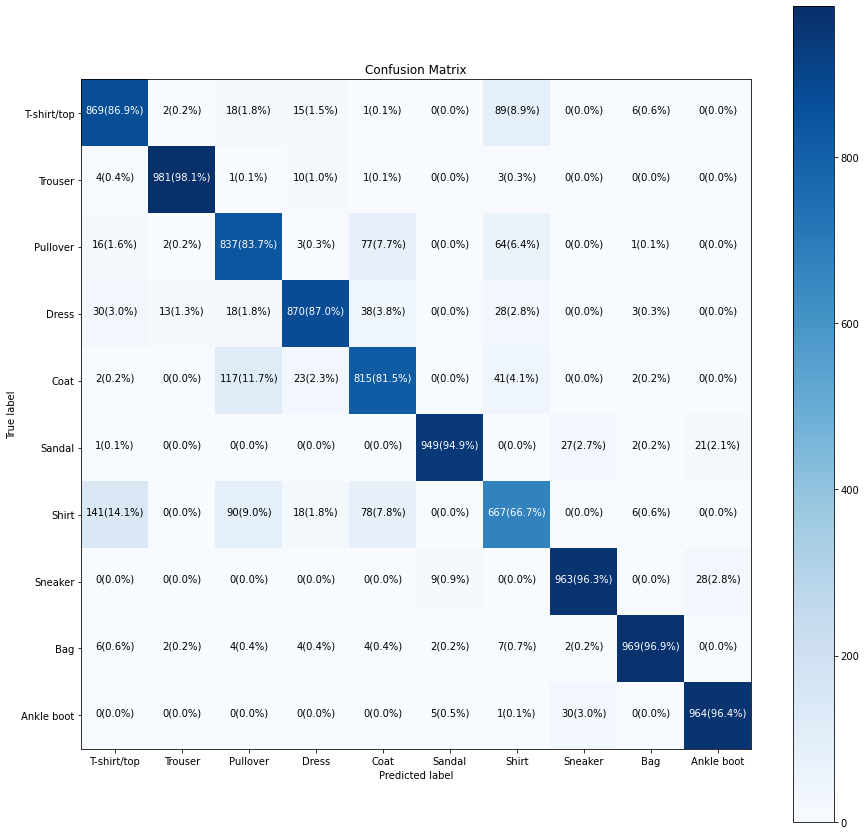

In [26]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels, y_pred=y_preds, classes=class_names, figsize=(15, 15), text_size=10)

In [27]:
# Let's create a function to plot a random image along with its prediction.

import random

def plot_random_image(model,images,true_labels,classes):
    """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """
    # setup random integer
    i = random.randint(0,len(images))
    
    # Create predictions and targets
    target_image=images[i]
    pred_probs = model.predict(target_image.reshape(1,28,28)) # have to reshape to get into right size for model
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]
    
    # Plot the target image
    plt.imshow(target_image,cmap=plt.cm.binary)
    
    # Change the color of the titles depending on if the prediction is right or wrong
    if pred_label == true_label:
        color = 'green'
    else:
        color = 'red'
        
    # Add xlabel information (prediction/true label)
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,100*tf.reduce_max(pred_probs),true_label),
               color=color) # set the color to green or red

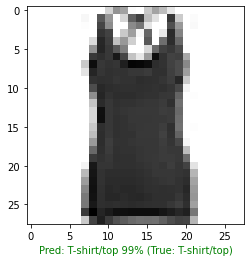

In [28]:
# Check out a random image as well as its prediction
plot_random_image(model=model_4,images=test_data,true_labels=test_labels,classes=class_names)